<a href="https://colab.research.google.com/github/Mani-21/Decoding/blob/main/text_encoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Converting text String to ASCII Values

In [1]:
text = input("enter a string to convert into ascii values: ")
ascii_values = [ord(character) for character in text]
print(ascii_values)

enter a string to convert into ascii values: amrita vishwa vidyapeetham
[97, 109, 114, 105, 116, 97, 32, 118, 105, 115, 104, 119, 97, 32, 118, 105, 100, 121, 97, 112, 101, 101, 116, 104, 97, 109]


Converting Integer values to bits

In [2]:
bits =[None]*len(ascii_values)
for i in range(len(ascii_values)):
  bits[i]=bin(ascii_values[i])[2:].zfill(8)

print(bits)

['01100001', '01101101', '01110010', '01101001', '01110100', '01100001', '00100000', '01110110', '01101001', '01110011', '01101000', '01110111', '01100001', '00100000', '01110110', '01101001', '01100100', '01111001', '01100001', '01110000', '01100101', '01100101', '01110100', '01101000', '01100001', '01101101']


Combine all strings to a single string and place each bit in a array


In [3]:
import numpy as np

bits = ''.join(map(str, bits))
print(bits)

bit_arr = []
for i in bits:
    for j in str(i):
        bit_arr.append(int(j))

bit_arr = np.array (bit_arr)
print(bit_arr)

0110000101101101011100100110100101110100011000010010000001110110011010010111001101101000011101110110000100100000011101100110100101100100011110010110000101110000011001010110010101110100011010000110000101101101
[0 1 1 0 0 0 0 1 0 1 1 0 1 1 0 1 0 1 1 1 0 0 1 0 0 1 1 0 1 0 0 1 0 1 1 1 0
 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 1 0 1 1 0 0 1 1 0 1 0 0 1 0 1
 1 1 0 0 1 1 0 1 1 0 1 0 0 0 0 1 1 1 0 1 1 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0
 0 0 1 1 1 0 1 1 0 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 0 0 1 1 1 1 0 0 1 0 1 1 0
 0 0 0 1 0 1 1 1 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 0 0 1 0 1 0 1 1 1 0 1 0 0 0
 1 1 0 1 0 0 0 0 1 1 0 0 0 0 1 0 1 1 0 1 1 0 1]


Modulation => ASK
TODO : FSK,PSK

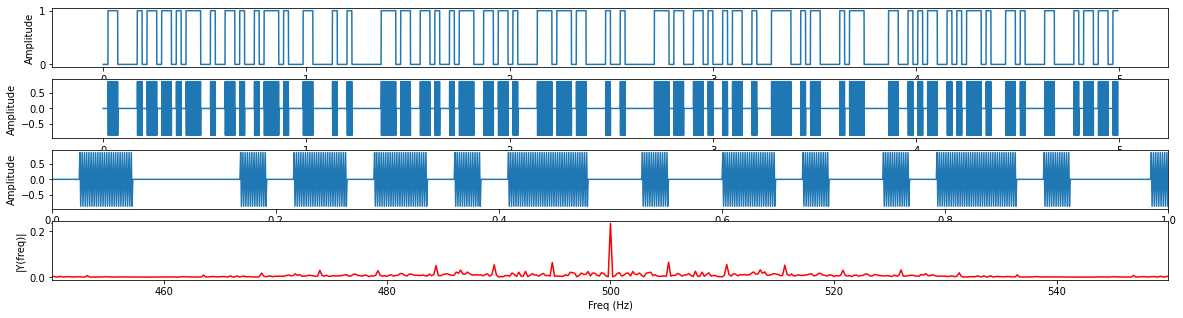

In [4]:
import matplotlib.pyplot as plot
import numpy as np

m = 0.25
Modulation_scheme = 'ask'
freq=500

Fs = 1500.0;  # sampling rate
Ts = 1.0/Fs; # sampling interval

samples_per_bit = 5*Fs/bit_arr.size 
dd = np.repeat(bit_arr, samples_per_bit)
t = np.arange(0,len(dd)*Ts,Ts)

if (Modulation_scheme =='fsk'):
	y= np.sin(2 * np.pi * (freq + freq*dd) * t)
elif (Modulation_scheme =='psk'):
	y= np.sin(2 * np.pi * (freq) * t+(np.pi*dd/180))
else:
	y= dd*np.sin(2 * np.pi * freq * t)
 
n = len(y) # length of the signal
k = np.arange(n)
T = n/Fs
frq = k/T # two sides frequency range
frq = frq[range(n//2)] # one side frequency range
Y = np.fft.fft(y)/n # fft computing and normalization
Y = Y[range(n//2)]

fig,myplot = plot.subplots(4, 1)

myplot[0].plot(t,dd)
myplot[0].set_xlabel('Time')
myplot[0].set_ylabel('Amplitude')

myplot[1].plot(t,y)
myplot[1].set_xlabel('Time')
myplot[1].set_ylabel('Amplitude')

myplot[2].plot(t,y)
myplot[2].set_xlabel('Zoomed Time axis')
myplot[2].set_ylabel('Amplitude')
myplot[2].set_xlim([0,1])

myplot[3].plot(frq,abs(Y),'r') # plotting the spectrum
myplot[3].set_xlabel('Freq (Hz)')
myplot[3].set_ylabel('|Y(freq)|')
myplot[3].set_xlim([450,550])

fig.set_figwidth(20)
fig.set_figheight(5)

plot.show()

Convert this waveform to a .wav file

In [5]:
import soundfile as sf
sf.write('sound.wav', y, 1500)